## Physical Activity Exploratory Data Analysis

In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import session_info
from utils import apply_scaling

from jmspack.NLTSA import (ts_levels, 
                           distribution_uniformity, 
                           fluctuation_intensity, 
                           complexity_resonance, 
                           complexity_resonance_diagram,
                          cumulative_complexity_peaks,
                          cumulative_complexity_peaks_plot)

from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler

In [2]:
session_info.show(write_req_file=False)

In [3]:
current_wd = os.getcwd()

In [4]:
os.chdir(current_wd + "/MyFitbitData/JamesTwose/")

In [5]:
steps_df = pd.DataFrame()
for file_name in glob.glob("Physical Activity/steps*"):
    tmp = pd.read_json(file_name)
    tmp = (tmp
     .assign(date=lambda d: pd.to_datetime(d["dateTime"]).dt.date)
     .groupby("date")
     .sum()
    )
    steps_df = pd.concat([steps_df, tmp])

In [6]:
steps_df = (steps_df
 .reset_index()
 .groupby("date")
     .sum()
)

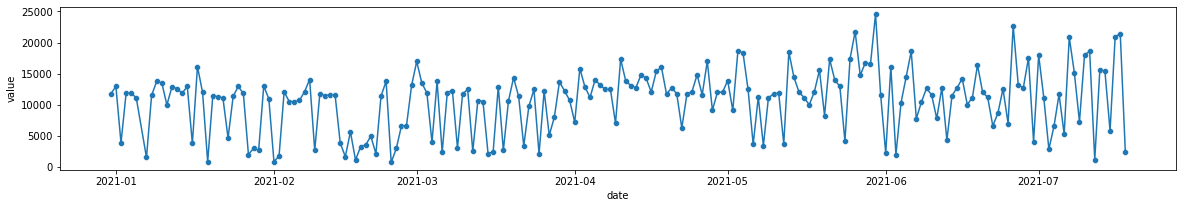

In [7]:
_ = plt.figure(figsize=(20,3))
_ = sns.lineplot(data=steps_df, x="date", y="value")
_ = sns.scatterplot(data=steps_df, x="date", y="value")

In [8]:
file_name = "heart_rate-2021-01-20.json"
tmp = pd.read_json("Physical Activity/" + file_name)

In [9]:
column_name="value"

In [10]:
tmp.head(2)

,dateTime,value
0,2021-01-19 23:00:03,"{'bpm': 86, 'confidence': 1}"
1,2021-01-19 23:00:13,"{'bpm': 84, 'confidence': 1}"


In [11]:
heart_df = pd.DataFrame()
for file_name in glob.glob("Physical Activity/heart_rate*"):
    tmp = pd.read_json(file_name)
    tmp = (tmp
             .merge(tmp["value"]
                    .apply(pd.Series), 
                    left_index=True, 
                    right_index=True)
             .drop("value", axis=1)
             .assign(dateTime = lambda d: pd.to_datetime(d["dateTime"]).dt.round("h"))
             .groupby("dateTime")
             .median()
            )
    heart_df = pd.concat([heart_df, tmp])

heart_df.to_csv("Physical Activity/heart_rate_per_hour.csv")

In [12]:
df = heart_df

In [13]:
os.chdir(current_wd)

In [14]:
df.head(2)

,bpm,confidence
dateTime,,
2021-04-20 22:00:00,60.0,3.0
2021-04-20 23:00:00,59.0,3.0


In [15]:
df.head(2)

,bpm,confidence
dateTime,,
2021-04-20 22:00:00,60.0,3.0
2021-04-20 23:00:00,59.0,3.0


## Raw data heatmap

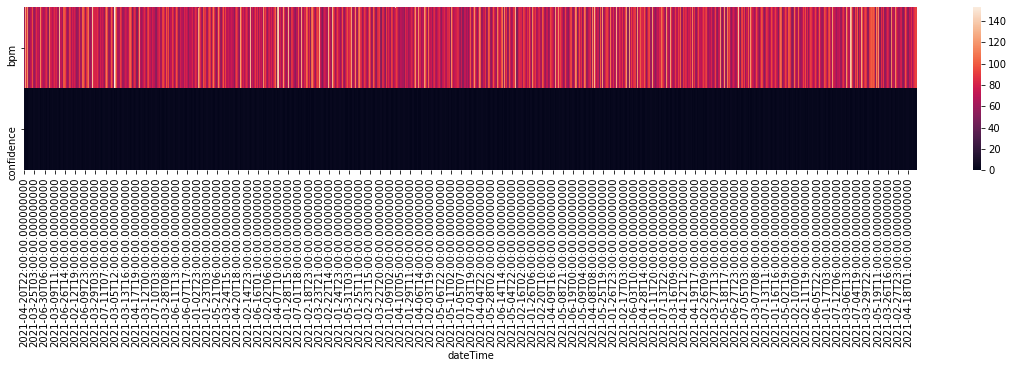

In [16]:
_ = plt.figure(figsize=(20, 3))
_ = sns.heatmap(data = df.T)

## Scaled data heatmap

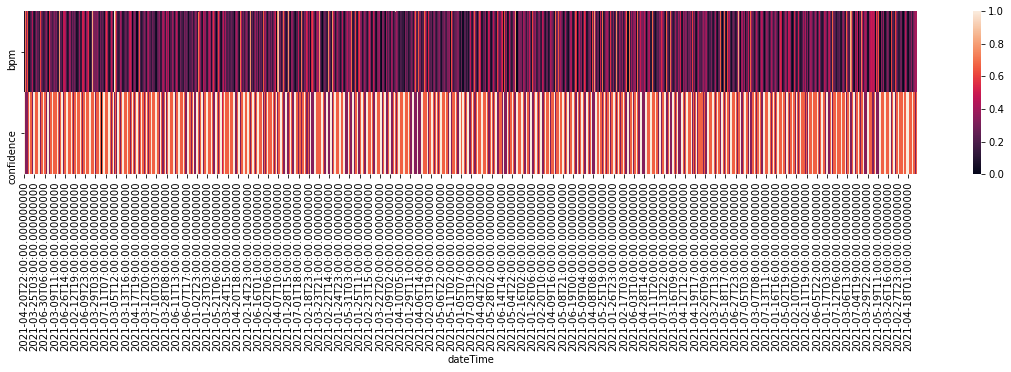

In [17]:
_ = plt.figure(figsize=(20, 3))
_ = sns.heatmap(df
                .pipe(apply_scaling)
                .T
               )

In [18]:
fi_df = fluctuation_intensity(df=df.pipe(apply_scaling), 
                      win=7, 
                      xmin=0, 
                      xmax=1, 
                      col_first=1, 
                      col_last=df.shape[1])

In [19]:
du_df = distribution_uniformity(df=df.pipe(apply_scaling), 
                      win=7, 
                      xmin=0, 
                      xmax=1, 
                      col_first=1, 
                      col_last=df.shape[1])

In [20]:
cr_df = complexity_resonance(fi_df, du_df)

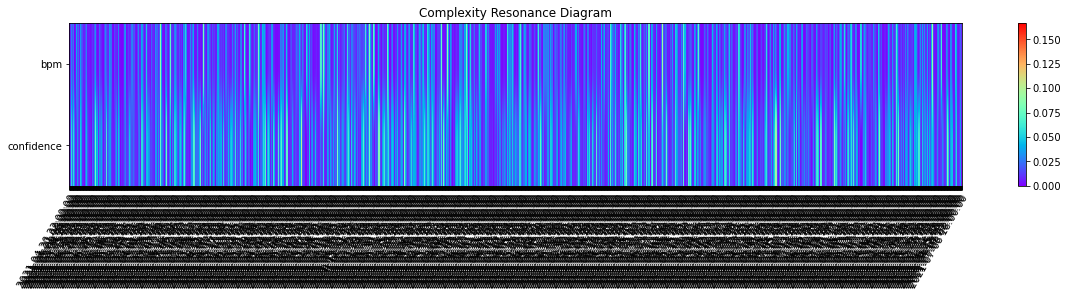

In [21]:
_ = complexity_resonance_diagram(cr_df, figsize=(20, 3))

In [22]:
cumulative_complexity_peaks_df, significant_peaks_df = cumulative_complexity_peaks(df = cr_df,
                            significant_level_item = 0.05,
                            significant_level_time = 0.05)

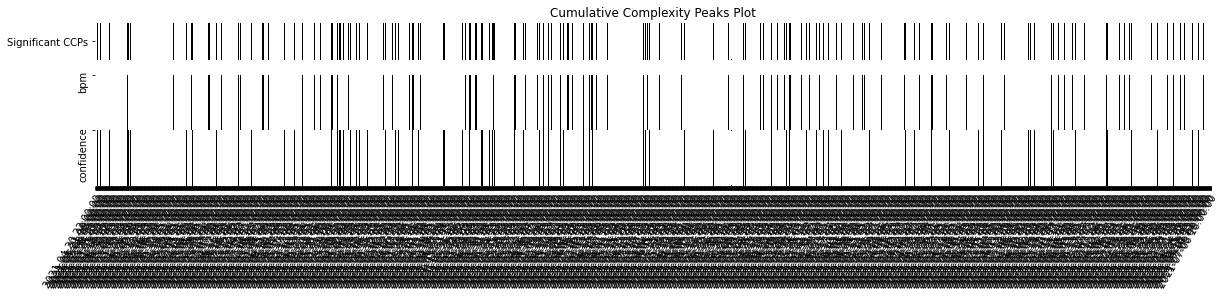

In [23]:
_ = cumulative_complexity_peaks_plot(cumulative_complexity_peaks_df=cumulative_complexity_peaks_df, 
                                     significant_peaks_df=significant_peaks_df,
                                     figsize=(20, 3))

## Dates of interest

In [24]:
significant_peaks_df[significant_peaks_df["Significant CCPs"]==1]

,Significant CCPs
2021-04-21 09:00:00,1.0
2021-04-21 10:00:00,1.0
2021-04-21 22:00:00,1.0
2021-02-08 00:00:00,1.0
2021-02-08 13:00:00,1.0
...,...
2021-04-18 14:00:00,1.0
2021-04-18 15:00:00,1.0
2021-04-18 16:00:00,1.0
2021-04-18 17:00:00,1.0


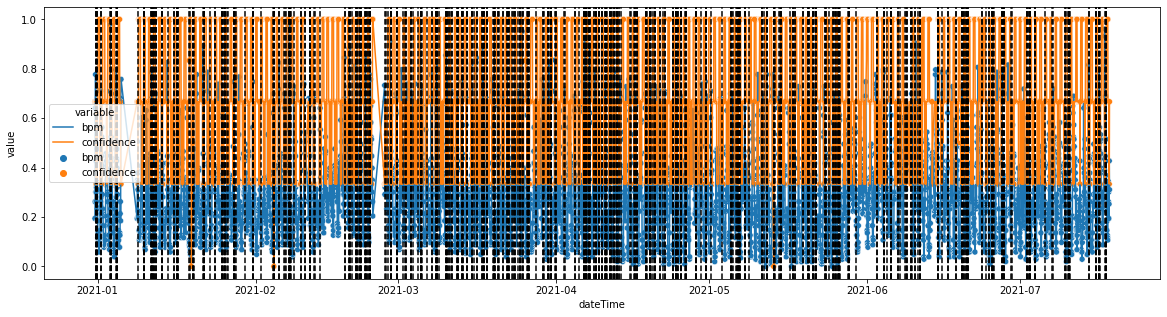

In [25]:
_ = plt.figure(figsize=(20, 5))
_ = sns.lineplot(data=df
 .pipe(apply_scaling)
 .reset_index()
 .melt(id_vars="dateTime"),
                 x="dateTime",
                 y="value",
                 hue="variable"
)
_ = sns.scatterplot(data=df
 .pipe(apply_scaling)
 .reset_index()
 .melt(id_vars="dateTime"),
                 x="dateTime",
                 y="value",
                 hue="variable"
)
for date in significant_peaks_df[significant_peaks_df["Significant CCPs"]==1].index.tolist():
    _ = plt.axvline(date, c="black", ls="--")

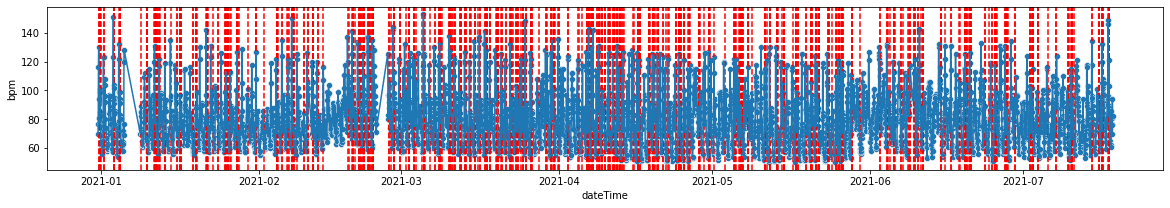

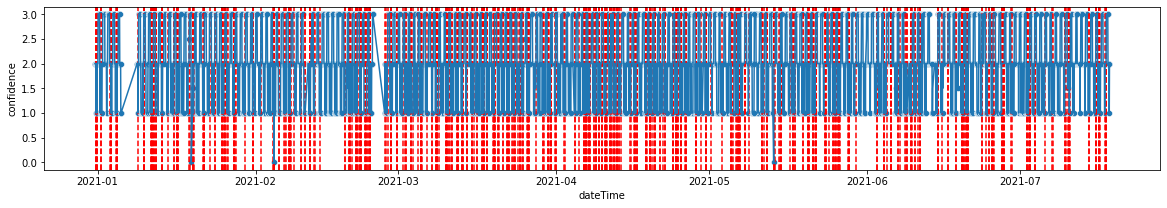

In [26]:
for col in df.columns.tolist():
    _ = plt.figure(figsize=(20, 3))
    for date in significant_peaks_df[significant_peaks_df["Significant CCPs"]==1].index.tolist():
        _ = plt.axvline(date, c="red", ls="--")
    _ = sns.lineplot(data=df
     .reset_index(),
                     x="dateTime",
                     y=col,
    )
    _ = sns.scatterplot(data=df
     .reset_index(),
                     x="dateTime",
                     y=col,
    )

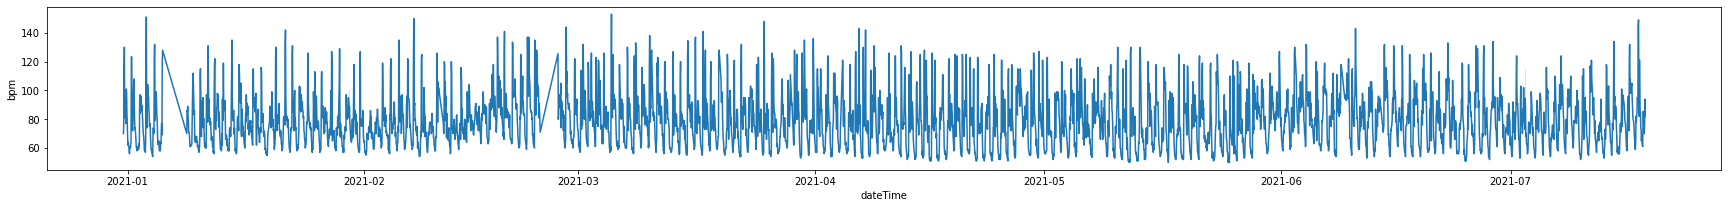

In [27]:
_ = plt.figure(figsize=(30, 3))
_ = sns.lineplot(data=df
     .reset_index(),
                     x="dateTime",
                     y="bpm",
    )